# Over expression and down regulation targets for lycopene production

In [1]:
from cobra.io import read_sbml_model

model = read_sbml_model('models/yeast_lyco.xml')

We want to know which reactions, if over expressed or down regulated, affect lycopene production. This will require going through all the reactions to see whether they affect lycopene production. Using flux scanning based enforced objective flux (FSEOF) it is possible to see which fluxes increase or decrease as the product flux increases. This method has been validated for lycopene production in $\textit{E. coli}$ as FSEOF accuretly predicted increased lycopene production when certain genes were over expressed  (Choi et al.).

In [80]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
plotter = PlotlyPlotter()
medium=model.medium

In [208]:
medium["r_1714"]=1.0
model.reactions.get_by_id("r_0012").genes

frozenset({<Gene YHR037W at 0x7fa271580130>})

In [199]:
model = read_sbml_model('models/yeast_lyco.xml')
model.medium=medium
model.medium

{'r_1654': 1000.0,
 'r_1714': 1.0,
 'r_1832': 1000.0,
 'r_1861': 1000.0,
 'r_1992': 1000.0,
 'r_2005': 1000.0,
 'r_2020': 1000.0,
 'r_2049': 1000.0,
 'r_2060': 1000.0,
 'r_2100': 1000.0,
 'r_4593': 1000.0,
 'r_4594': 1000.0,
 'r_4595': 1000.0,
 'r_4596': 1000.0,
 'r_4597': 1000.0,
 'r_4600': 1000.0}

In [200]:
fseof = FSEOF(model)

In [201]:
sol=fseof.run(target=model.reactions.get_by_id("CrtI"))
sol.plot(plotter)
df=sol.data_frame

In [202]:
df

,1,2,3,4,5,6,7,8,9,10
r_0024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003360
r_0091,0.144106,0.227637,0.311168,0.394700,0.478231,0.561762,0.408665,0.222283,0.035901,0.000000
r_0103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020691
r_0104,0.079718,0.140907,0.202095,0.263283,0.324471,0.385659,0.446658,0.507637,0.568617,0.608757
r_0215,0.021356,0.019423,0.017490,0.015556,0.013623,0.011689,0.017094,0.013151,0.009209,0.083657
...,...,...,...,...,...,...,...,...,...,...
r_4216,-0.000001,-0.000001,-0.000001,-0.000001,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
r_4262,0.106875,0.097199,0.087524,0.077848,0.068173,0.058497,0.040055,0.030816,0.021578,0.011548
r_4460,-0.262000,-0.272483,-0.282967,-0.293450,-0.303933,-0.314416,-0.322329,-0.329985,-0.337641,-0.343268
CrtB,0.007841,0.015682,0.023522,0.031363,0.039204,0.047045,0.054886,0.062726,0.070567,0.078408


In [203]:
df.columns[1]

2

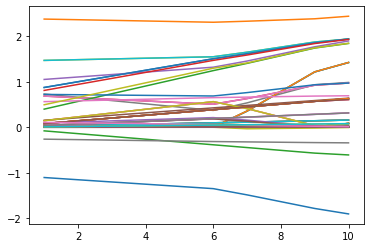

In [204]:
from matplotlib import pyplot as plt
plt.plot(df.T);

In [180]:
Keys = []
for row in range(len(df[1])):
    if df[1][row]!=0:
        if abs(df[1][row]-df[10][row])/abs(df[1][row])>2.5 and abs(df[10][row])>2:
            Keys.append(df.index[row])

In [181]:
Keys

['r_0104',
 'r_0455',
 'r_0491',
 'r_0558',
 'r_0560',
 'r_0737',
 'r_0739',
 'r_0800',
 'r_0904',
 'r_0961',
 'r_1021',
 'r_1129',
 'r_1265',
 'r_2034',
 'r_1840']

In [182]:
Reactions=df.T[Keys].T.sort_values(by=[10])

In [193]:
Reactions

,1,2,3,4,5,6,7,8,9,10
r_1840,-0.813126,-1.435135,-2.057144,-2.679153,-3.301162,-3.922051,-4.541943,-5.161835,-5.714870,-5.967578
r_0455,0.318824,0.637647,0.956471,1.275294,1.594118,1.912941,2.231765,2.550588,2.869412,3.188236
r_1021,0.403895,0.715137,1.026380,1.337622,1.648864,1.959560,2.269776,2.579993,2.889856,3.198996
r_1265,0.403895,0.715137,1.026380,1.337622,1.648864,1.959564,2.269779,2.579995,2.889857,3.198996
r_0104,0.813126,1.435135,2.057144,2.679153,3.301162,3.922051,4.541943,5.161835,5.714870,5.967578
r_0560,0.813126,1.435135,2.057144,2.679153,3.301162,3.922051,4.541943,5.161835,5.714870,5.967578
r_1129,0.813126,1.435135,2.057144,2.679153,3.301162,3.922051,4.541943,5.161835,5.714870,5.967578
r_0558,0.813126,1.435135,2.057144,2.679153,3.301162,3.922051,4.541943,5.161835,5.780997,6.398668
r_0737,0.813126,1.435135,2.057144,2.679153,3.301162,3.922051,4.541943,5.161835,5.780997,6.398668
r_0739,0.813126,1.435135,2.057144,2.679153,3.301162,3.922051,4.541943,5.161835,5.780997,6.398668


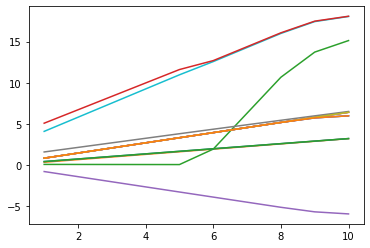

In [183]:
plt.plot(df.T[Keys],label=Keys)

In [196]:
for id in Reactions.index:
    r=model.reactions.get_by_id(id)
    print(r.name, id, Reactions.T[id][10])
    s=""
    for rea in range(len(r.reactants)):
        if rea==len(r.reactants)-1:
            s+=r.reactants[rea].name+" ==> "
        else:
            s+=r.reactants[rea].name+" + "
    for p in range(len(r.products)):
        if p==len(r.products)-1:
            s+=r.products[p].name
        else:
            s+=r.products[p].name+" + "
    print(s)
    print()

hydroxymethylglutaryl-CoA transport r_1840 -5.967578
3-hydroxy-3-methylglutaryl-CoA [cytoplasm] ==> 3-hydroxy-3-methylglutaryl-CoA [mitochondrion]

soluble fumarate reductase r_0455 3.188236
FADH2 [cytoplasm] + fumarate [cytoplasm] ==> FAD [cytoplasm] + H+ [cytoplasm] + succinate [cytoplasm]

succinate dehydrogenase (ubiquinone-6) r_1021 3.198996
succinate [mitochondrion] + ubiquinone-6 [mitochondrion] ==> fumarate [mitochondrion] + ubiquinol-6 [mitochondrion]

succinate-fumarate transport r_1265 3.198996
fumarate [mitochondrion] + succinate [cytoplasm] ==> fumarate [cytoplasm] + succinate [mitochondrion]

acetyl-CoA C-acetyltransferase r_0104 5.967578
acetyl-CoA [mitochondrion] ==> acetoacetyl-CoA [mitochondrion] + coenzyme A [mitochondrion]

hydroxymethylglutaryl CoA synthase r_0560 5.967578
acetoacetyl-CoA [mitochondrion] + acetyl-CoA [mitochondrion] + H2O [mitochondrion] ==> 3-hydroxy-3-methylglutaryl-CoA [mitochondrion] + coenzyme A [mitochondrion] + H+ [mitochondrion]

coenzyme A

Looking through the list of reactions above we can see that these reactions make intuative sense when looking at the pathway.

In [48]:
import escher
from escher import Builder


KeyboardInterrupt: 